### Exploring Credit Risks

This activity is another open exploration of a dataset using both cleaning methods and visualizations.  The data describes customers as good or bad credit risks based on a small set of features specified below.  Your task is to create a Jupyter notebook with an exploration of the data using both your `pandas` cleaning and analysis skills and your visualization skills using `matplotlib`, `seaborn`, and `plotly`.  Your final notebook should be formatted with appropriate headers and markdown cells with written explanations for the code that follows. 

Post your notebook file in Canvas, as well as a brief (3-4 sentence) description of what you found through your analysis. Respond to your peers with reflections on thier analysis. 

-----


##### Data Description

```
1. Status of existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,...)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,...) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g. real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,...)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes,no)
20. Foreign worker (yes,no)
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('data/dataset_31_credit-g.csv')

In [3]:
df.head(3)

checking_status  duration                    credit_history    purpose  \
0            '<0'         6  'critical/other existing credit'   radio/tv   
1      '0<=X<200'        48                   'existing paid'   radio/tv   
2   'no checking'        12  'critical/other existing credit'  education   

   credit_amount      savings_status employment  installment_commitment  \
0           1169  'no known savings'      '>=7'                       4   
1           5951              '<100'   '1<=X<4'                       2   
2           2096              '<100'   '4<=X<7'                       2   

        personal_status other_parties  ...  property_magnitude age  \
0         'male single'          none  ...       'real estate'  67   
1  'female div/dep/mar'          none  ...       'real estate'  22   
2         'male single'          none  ...       'real estate'  49   

   other_payment_plans housing existing_credits                   job  \
0                 none     own                2               skilled   
1                 none     own                1               skilled   
2                 none     own                1  'unskilled resident'   

  num_dependents  own_telephone foreign_worker class  
0              1            yes            yes  good  
1              1           none            yes   bad  
2              2           none            yes  good  

[3 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

### Feature Engineering

##### Find all the Categorical Columns in the DataFrame

In [5]:
cat_cols = df.select_dtypes(include=['object']).columns.to_list()
cat_cols

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker',
 'class']

##### Find the Unique Values of all the categorical columns in the DataFrame

In [6]:
for col in cat_cols:
    print('{:20} : {}\n'.format(col, df[col].unique()))

checking_status      : ["'<0'" "'0<=X<200'" "'no checking'" "'>=200'"]

credit_history       : ["'critical/other existing credit'" "'existing paid'"
 "'delayed previously'" "'no credits/all paid'" "'all paid'"]

purpose              : ['radio/tv' 'education' 'furniture/equipment' "'new car'" "'used car'"
 'business' "'domestic appliance'" 'repairs' 'other' 'retraining']

savings_status       : ["'no known savings'" "'<100'" "'500<=X<1000'" "'>=1000'" "'100<=X<500'"]

employment           : ["'>=7'" "'1<=X<4'" "'4<=X<7'" 'unemployed' "'<1'"]

personal_status      : ["'male single'" "'female div/dep/mar'" "'male div/sep'" "'male mar/wid'"]

other_parties        : ['none' 'guarantor' "'co applicant'"]

property_magnitude   : ["'real estate'" "'life insurance'" "'no known property'" 'car']

other_payment_plans  : ['none' 'bank' 'stores']

housing              : ['own' "'for free'" 'rent']

job                  : ['skilled' "'unskilled resident'" "'high qualif/self emp/mgmt'"
 "'unemp/unski

### Observation:
Based on the above results, it looks like we don't have any null values or data that looks like a null value (example: N/A or Not Applicable). There are two columns with `none` as value. However, it looks like those are valid values to keep.

##### Find all the Numerical Columns in the DataFrame

In [7]:
num_cols = df.select_dtypes(exclude=['object']).columns.to_list()
num_cols

['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents']

In [8]:
for col in num_cols:
    print('{:20} : {}\n'.format(col, df[col].unique()))

duration             : [ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40]

credit_amount        : [ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  2622
  2337  7057  1469  2323   932  1919  2445 11938  6458  6078  7721  1410
  1449   392  6260  7855  1680  3578  7174  2132  4281  2366  1835  3868
  1768   781  1924  2121   701   639  1860  3499  8487  6887  2708  1984
 10144  1240  8613   766  2728  1881   709  4795

##### Remove all the single quotes from the categorical columns

In [9]:
for col in cat_cols:
    df.loc[:, col] = df.loc[:, col].str.replace("'", "")

##### Let's check for unique values again to see if all the quotes are removed

In [10]:
for col in cat_cols:
    print('{:20} : {}\n'.format(col, df[col].unique()))

checking_status      : ['<0' '0<=X<200' 'no checking' '>=200']

credit_history       : ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']

purpose              : ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']

savings_status       : ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']

employment           : ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']

personal_status      : ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']

other_parties        : ['none' 'guarantor' 'co applicant']

property_magnitude   : ['real estate' 'life insurance' 'no known property' 'car']

other_payment_plans  : ['none' 'bank' 'stores']

housing              : ['own' 'for free' 'rent']

job                  : ['skilled' 'unskilled resident' 'high qualif/self emp/mgmt'
 'unemp/unskilled non res']

own_telephone        : ['yes' 'none']

foreign_wo

### Observation:
Looking at the values for `own_telephone`, we can change the value of `none` to `no`. It would make more sense to have the value as `no`.

In [11]:
df[cat_cols].head(10)

checking_status                  credit_history              purpose  \
0              <0  critical/other existing credit             radio/tv   
1        0<=X<200                   existing paid             radio/tv   
2     no checking  critical/other existing credit            education   
3              <0                   existing paid  furniture/equipment   
4              <0              delayed previously              new car   
5     no checking                   existing paid            education   
6     no checking                   existing paid  furniture/equipment   
7        0<=X<200                   existing paid             used car   
8     no checking                   existing paid             radio/tv   
9        0<=X<200  critical/other existing credit              new car   

     savings_status  employment     personal_status other_parties  \
0  no known savings         >=7         male single          none   
1              <100      1<=X<4  female div/dep/mar          none   
2              <100      4<=X<7         male single          none   
3              <100      4<=X<7         male single     guarantor   
4              <100      1<=X<4         male single          none   
5  no known savings      1<=X<4         male single          none   
6       500<=X<1000         >=7         male single          none   
7              <100      1<=X<4         male single          none   
8            >=1000      4<=X<7        male div/sep          none   
9              <100  unemployed        male mar/wid          none   

  property_magnitude other_payment_plans   housing                        job  \
0        real estate                none       own                    skilled   
1        real estate                none       own                    skilled   
2        real estate                none       own         unskilled resident   
3     life insurance                none  for free                    skilled   
4  no known property                none  for free                    skilled   
5  no known property                none  for free         unskilled resident   
6     life insurance                none       own                    skilled   
7                car                none      rent  high qualif/self emp/mgmt   
8        real estate                none       own         unskilled resident   
9                car                none       own  high qualif/self emp/mgmt   

  own_telephone foreign_worker class  
0           yes            yes  good  
1          none            yes   bad  
2          none            yes  good  
3          none            yes  good  
4          none            yes   bad  
5           yes            yes  good  
6          none            yes  good  
7           yes            yes  good  
8          none            yes  good  
9          none            yes   bad

In [12]:
df.loc[df['own_telephone'] == 'none', 'own_telephone'] = 'no'

In [13]:
df[cat_cols].head(10)

checking_status                  credit_history              purpose  \
0              <0  critical/other existing credit             radio/tv   
1        0<=X<200                   existing paid             radio/tv   
2     no checking  critical/other existing credit            education   
3              <0                   existing paid  furniture/equipment   
4              <0              delayed previously              new car   
5     no checking                   existing paid            education   
6     no checking                   existing paid  furniture/equipment   
7        0<=X<200                   existing paid             used car   
8     no checking                   existing paid             radio/tv   
9        0<=X<200  critical/other existing credit              new car   

     savings_status  employment     personal_status other_parties  \
0  no known savings         >=7         male single          none   
1              <100      1<=X<4  female div/dep/mar          none   
2              <100      4<=X<7         male single          none   
3              <100      4<=X<7         male single     guarantor   
4              <100      1<=X<4         male single          none   
5  no known savings      1<=X<4         male single          none   
6       500<=X<1000         >=7         male single          none   
7              <100      1<=X<4         male single          none   
8            >=1000      4<=X<7        male div/sep          none   
9              <100  unemployed        male mar/wid          none   

  property_magnitude other_payment_plans   housing                        job  \
0        real estate                none       own                    skilled   
1        real estate                none       own                    skilled   
2        real estate                none       own         unskilled resident   
3     life insurance                none  for free                    skilled   
4  no known property                none  for free                    skilled   
5  no known property                none  for free         unskilled resident   
6     life insurance                none       own                    skilled   
7                car                none      rent  high qualif/self emp/mgmt   
8        real estate                none       own         unskilled resident   
9                car                none       own  high qualif/self emp/mgmt   

  own_telephone foreign_worker class  
0           yes            yes  good  
1            no            yes   bad  
2            no            yes  good  
3            no            yes  good  
4            no            yes   bad  
5           yes            yes  good  
6            no            yes  good  
7           yes            yes  good  
8            no            yes  good  
9            no            yes   bad

##### Let's identify sex - male or female. 
We already have `personal_status` with values. We can check this to find out if they are `male` or `female`.

In [14]:
male = ['male single', 'male div/sep', 'male mar/wid']
df['gender'] = np.where(df['personal_status'].isin(male),'male','female')

In [15]:
# We can also do the same thing by using the split function as the data has sex and status separated by space
# It will split the data into two parts giving one column with sex (Male & Female)
# And the other column with personal status


df[['gender_', 'status_']] = df['personal_status'].str.split(' ', n=1, expand=True)

In [16]:
df[['personal_status','gender','gender_','status_']].head(20)

personal_status  gender gender_      status_
0          male single    male    male       single
1   female div/dep/mar  female  female  div/dep/mar
2          male single    male    male       single
3          male single    male    male       single
4          male single    male    male       single
5          male single    male    male       single
6          male single    male    male       single
7          male single    male    male       single
8         male div/sep    male    male      div/sep
9         male mar/wid    male    male      mar/wid
10  female div/dep/mar  female  female  div/dep/mar
11  female div/dep/mar  female  female  div/dep/mar
12  female div/dep/mar  female  female  div/dep/mar
13         male single    male    male       single
14  female div/dep/mar  female  female  div/dep/mar
15  female div/dep/mar  female  female  div/dep/mar
16         male single    male    male       single
17         male single    male    male       single
18  female div/dep/mar  female  female  div/dep/mar
19         male single    male    male       single

In [17]:
df.groupby(['personal_status'])['gender'].count()

personal_status
female div/dep/mar    310
male div/sep           50
male mar/wid           92
male single           548
Name: gender, dtype: int64

In [18]:
df.groupby(['gender'])['gender'].count()

gender
female    310
male      690
Name: gender, dtype: int64

The dataset has approximately 1/3rd females and 2/3rd males (310/100 = ~1/3, 690/1000 = ~2/3)

##### Analyze credit_history
Unique values are : 
 - `critical/other existing credit`,
 - `existing paid`, 
 - `delayed previously`,
 - `no credits/all paid`,
 - `all paid`
 
 
 As you can see, `no credits/all paid` and `all paid` means the same. They don't have any credit. So let's consolidate them under `all paid`

In [19]:
df.groupby(['credit_history'])['credit_history'].count()

credit_history
all paid                           49
critical/other existing credit    293
delayed previously                 88
existing paid                     530
no credits/all paid                40
Name: credit_history, dtype: int64

In [20]:
df.loc[df['credit_history'] == 'no credits/all paid', 'credit_history'] = 'all paid'

In [21]:
df.groupby(['credit_history'])['credit_history'].count()

credit_history
all paid                           89
critical/other existing credit    293
delayed previously                 88
existing paid                     530
Name: credit_history, dtype: int64

### Visualizations

<Figure size 1600x1000 with 0 Axes>

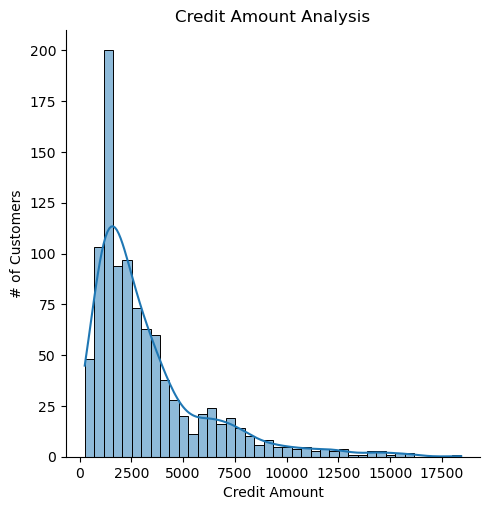

In [22]:
fig = plt.figure(figsize=(16, 10))
sns.displot(data=df, bins=40, x="credit_amount", kde=True).set(title='Credit Amount Analysis', 
                                                      xlabel='Credit Amount', ylabel='# of Customers')
plt.show()

#### Observation
There are many customers with credit card amount less than 5000. It looks like most of the credit card payments are in the range of 1000 and 3000 based on this data. Further analysis is required to see how this breaks down

#### Explore Violin Plot
Let's see what the Violin plot will show based on Credit Amount and Credit History Segments. Let's also break this down by gender to see if we can see any patterns

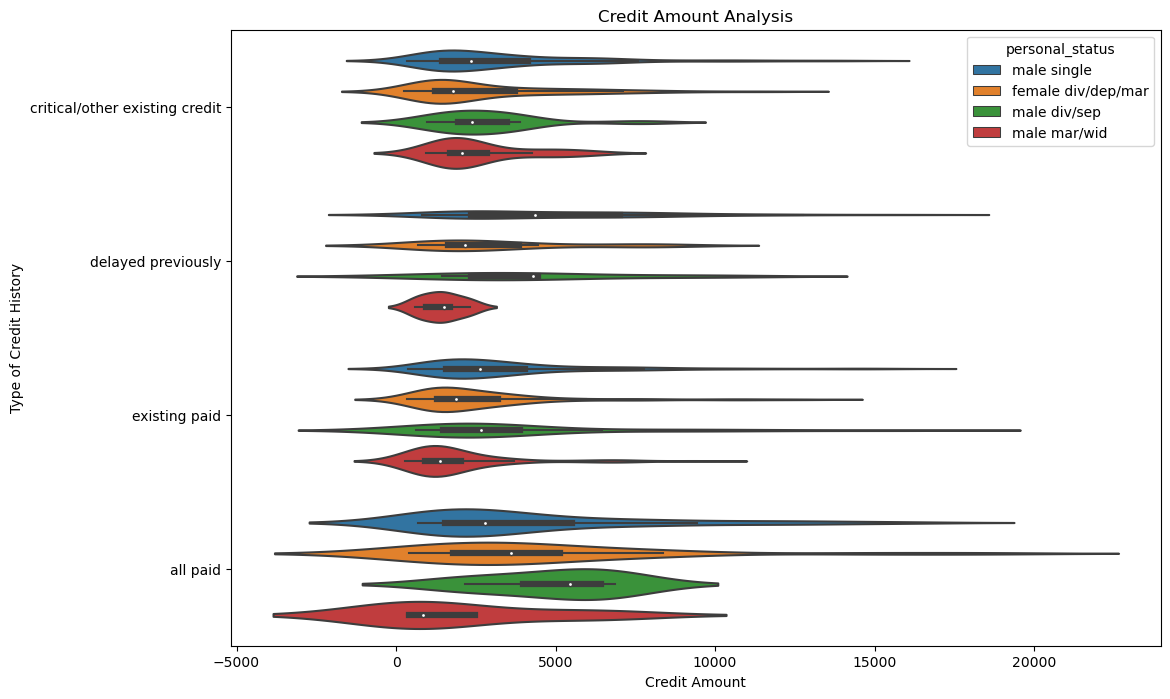

In [23]:
fig = plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='credit_amount', y='credit_history', hue='personal_status',
               order=['critical/other existing credit', 'delayed previously', 'existing paid', 'all paid']).set(
                title='Credit Amount Analysis', xlabel='Credit Amount', ylabel='Type of Credit History')
plt.show()

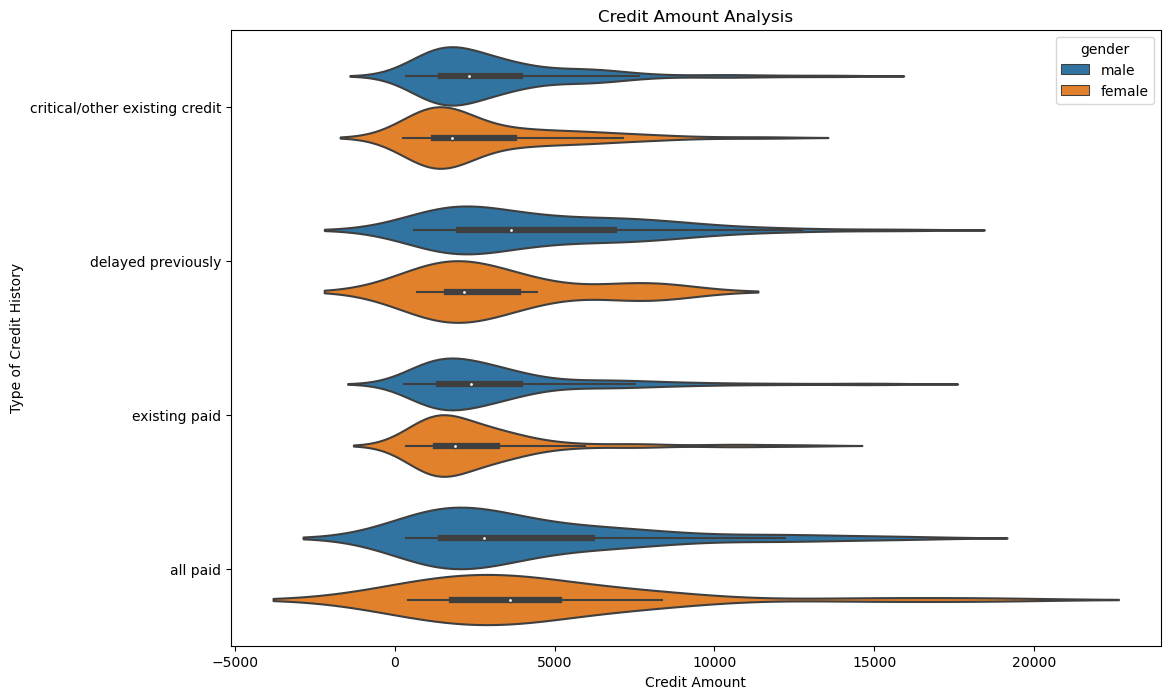

In [24]:
fig = plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='credit_amount', y='credit_history', hue='gender',
               order=['critical/other existing credit', 'delayed previously', 'existing paid', 'all paid']).set(
                title='Credit Amount Analysis', xlabel='Credit Amount', ylabel='Type of Credit History')
plt.show()

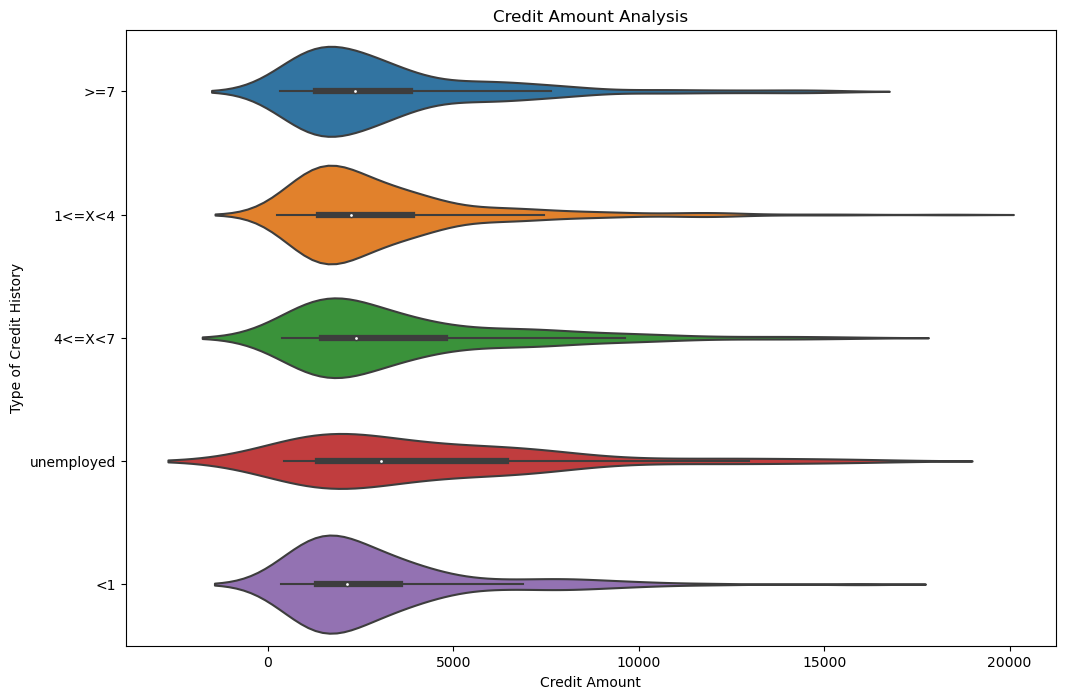

In [25]:
fig = plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='credit_amount', y='employment', \
               #order=['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7'] \
               #order=['critical/other existing credit', 'delayed previously', 'existing paid', 'all paid']) \
                ).set(title='Credit Amount Analysis', xlabel='Credit Amount', ylabel='Type of Credit History')
#plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

This does not provide enough information for us to take any action. While this looks good, we may still need other visualization techniques to help us learn more about the data

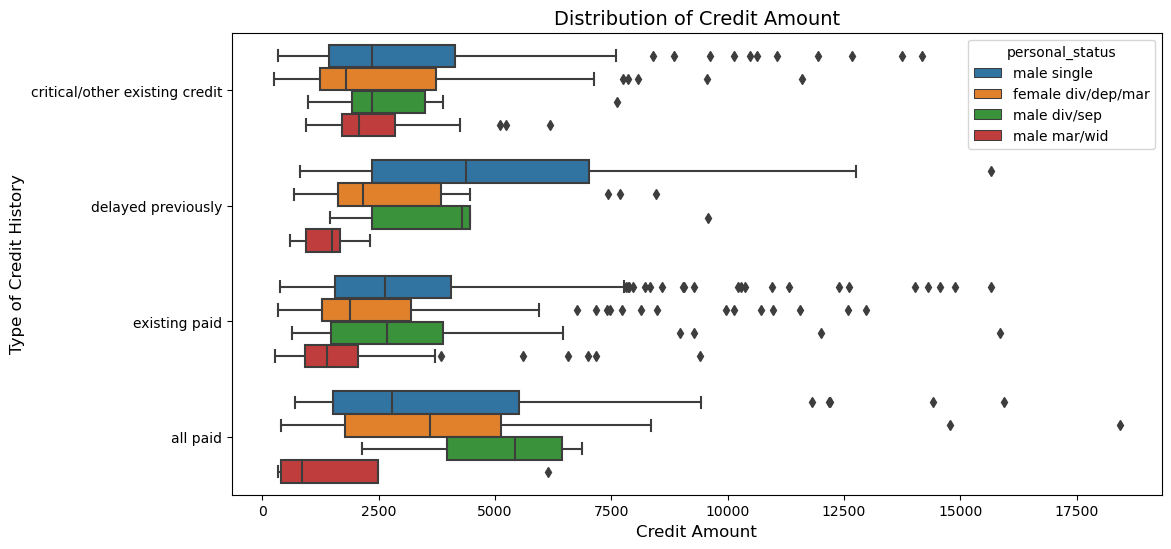

In [26]:
# Let's create a 12 x 6 figure and plot the seaborn boxplot to show 
# distribution of credit amount by each credit history type
# Let's also look at this by personal status to learn about the how they compare
# Let's also create a title for the graph, add x label and y label
# Let's also order them as 'critical/other existing credit', 'delayed previously', 'existing paid', 'all paid'

fig = plt.figure(figsize=(12, 6))
ax = sns.boxplot(df, x='credit_amount', y='credit_history', hue='personal_status',
                 order=['critical/other existing credit', 'delayed previously', 'existing paid', 'all paid'])
ax.axes.set_title("Distribution of Credit Amount", fontsize=14)
ax.set_xlabel('Credit Amount', fontsize=12)
ax.set_ylabel('Type of Credit History', fontsize=12)

plt.show()

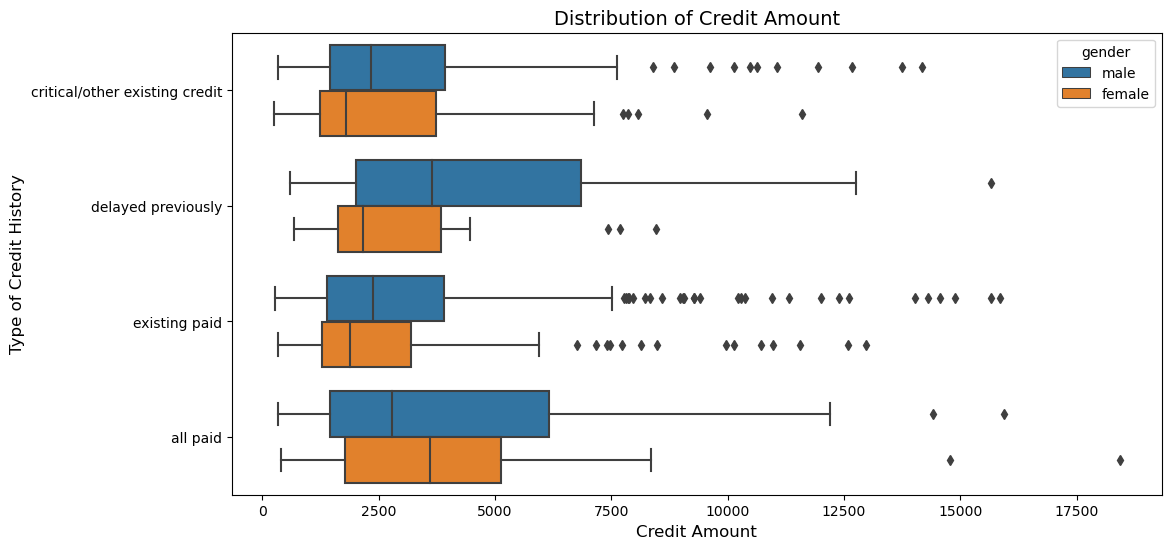

In [27]:
# Let's create a 12 x 6 figure and plot the seaborn boxplot to show 
# distribution of credit amount by each credit history type
# Let's also look at this by personal status to learn about the how they compare
# Let's also create a title for the graph, add x label and y label
# Let's also order them as 'critical/other existing credit', 'delayed previously', 'existing paid', 'all paid'

fig = plt.figure(figsize=(12, 6))
ax = sns.boxplot(df, x='credit_amount', y='credit_history', hue='gender',
                 order=['critical/other existing credit', 'delayed previously', 'existing paid', 'all paid'])
ax.axes.set_title("Distribution of Credit Amount", fontsize=14)
ax.set_xlabel('Credit Amount', fontsize=12)
ax.set_ylabel('Type of Credit History', fontsize=12)

plt.show()

#### Observation: 
This shows that most males take larger credit debt. It also shows that males have delayed previous payments. This could be due to the fact that 2/3rd of the population is males. However, the median value for both critical and delayed previously shows that males may default.

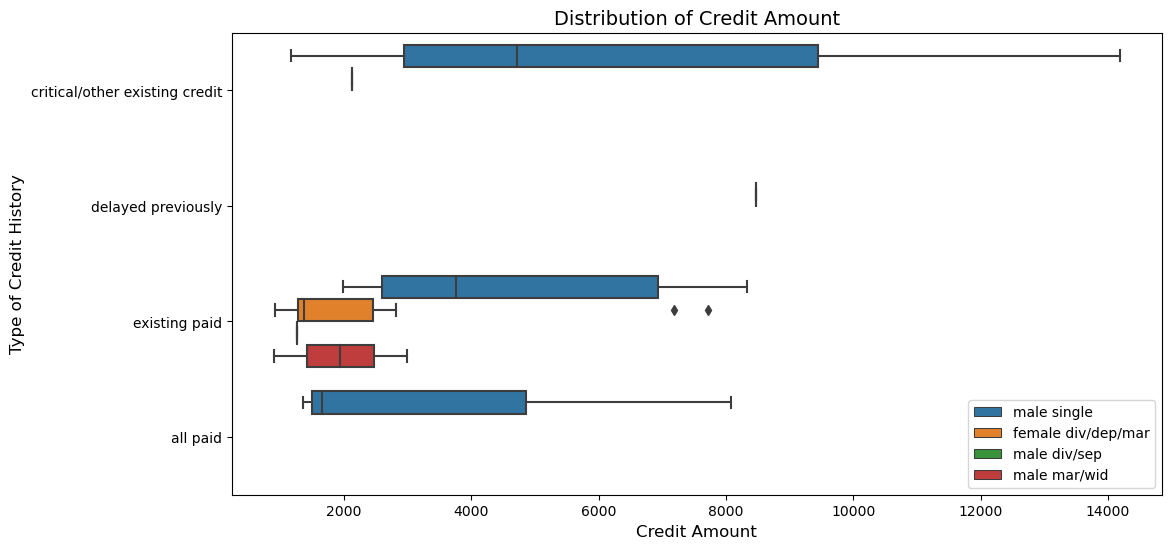

In [28]:
# Let's find out the distribution of credit amounts based on whether the customer has 
# any money in the checking account or savings account. If they don't have any money, then it is assumed high risk

fig = plt.figure(figsize=(12, 6))
ax = sns.boxplot(df.query('checking_status == "<0" and savings_status == "no known savings"'),
                 x='credit_amount', y='credit_history',hue='personal_status',
                 order=['critical/other existing credit', 'delayed previously', 'existing paid', 'all paid'])

ax.axes.set_title("Distribution of Credit Amount", fontsize=14)
ax.set_xlabel('Credit Amount', fontsize=12)
ax.set_ylabel('Type of Credit History', fontsize=12)

plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

#### Observations:
Taking it one step further, it looks like males are prominent in missing payments when they don't have money in their bank accounts. 

#### Analysis by Employment Type

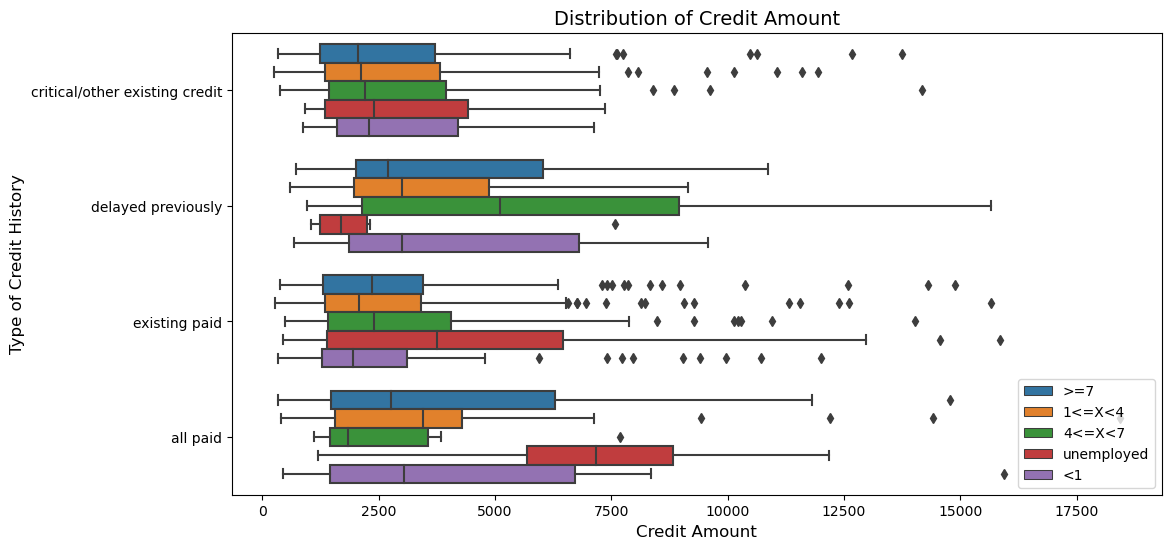

In [29]:
# Let's find out the distribution of credit amounts based on employment
# This will tell us if they have the ability to make payments (assuming employment helps with payments)

fig = plt.figure(figsize=(12, 6))
ax = sns.boxplot(df,
                x='credit_amount', y='credit_history',hue='employment',
                order=['critical/other existing credit', 'delayed previously', 'existing paid', 'all paid'])

ax.axes.set_title("Distribution of Credit Amount", fontsize=14)
ax.set_xlabel('Credit Amount', fontsize=12)
ax.set_ylabel('Type of Credit History', fontsize=12)

plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

In [30]:
dg_purpose_history = df.groupby(['credit_history','personal_status'])['credit_amount'] \
               .sum() \
               .reset_index() \
               .sort_values('credit_amount', ascending=False)
dg_purpose_history

credit_history     personal_status  credit_amount
15                   existing paid         male single         895886
7   critical/other existing credit         male single         598695
12                   existing paid  female div/dep/mar         493978
11              delayed previously         male single         293288
3                         all paid         male single         218854
4   critical/other existing credit  female div/dep/mar         217023
0                         all paid  female div/dep/mar         129202
14                   existing paid        male mar/wid         116855
13                   existing paid        male div/sep         104989
8               delayed previously  female div/dep/mar          51907
6   critical/other existing credit        male mar/wid          51850
5   critical/other existing credit        male div/sep          37227
9               delayed previously        male div/sep          22126
1                         all paid        male div/sep          19893
10              delayed previously        male mar/wid          11308
2                         all paid        male mar/wid           8177

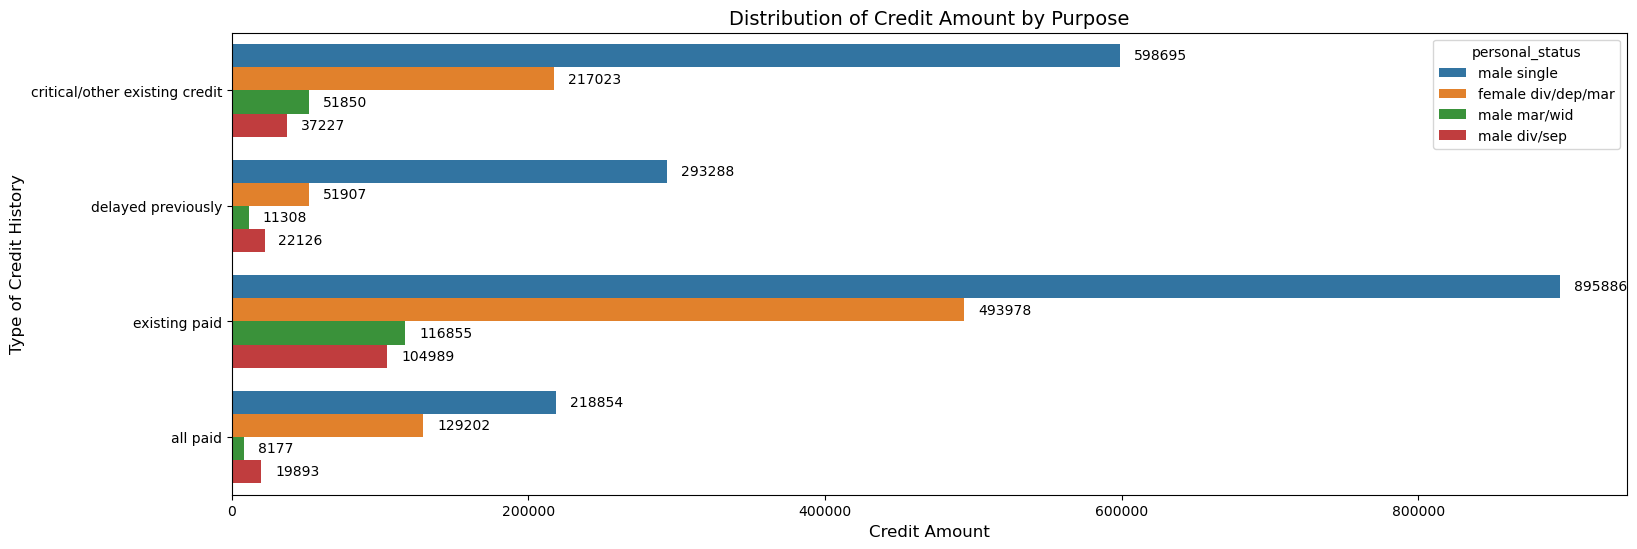

In [31]:
# Let's find out the distribution of credit amounts based on purpose of purchase
# This will tell us where the money was spent and also help us understand the customer base

fig = plt.figure(figsize=(18, 6))
ax = sns.barplot(dg_purpose_history, x='credit_amount', y='credit_history', 
                 hue='personal_status', errorbar=None,
                 order=['critical/other existing credit', 'delayed previously', 'existing paid', 'all paid'])
for container in ax.containers:
    ax.bar_label(container, padding=10, rotation=0)

ax.axes.set_title("Distribution of Credit Amount by Purpose", fontsize=14)
ax.set_xlabel('Credit Amount', fontsize=12)
ax.set_ylabel('Type of Credit History', fontsize=12)

plt.show()

#### Credit Card Spend based on Purpose

In [32]:
dg_purpose = df.groupby(['purpose'])['credit_amount'] \
               .sum() \
               .reset_index() \
               .sort_values('credit_amount', ascending=False)
dg_purpose

purpose  credit_amount
4              new car         716748
6             radio/tv         696543
3  furniture/equipment         555125
9             used car         553133
0             business         403330
2            education         159020
5                other          98512
7              repairs          60018
1   domestic appliance          17976
8           retraining          10853

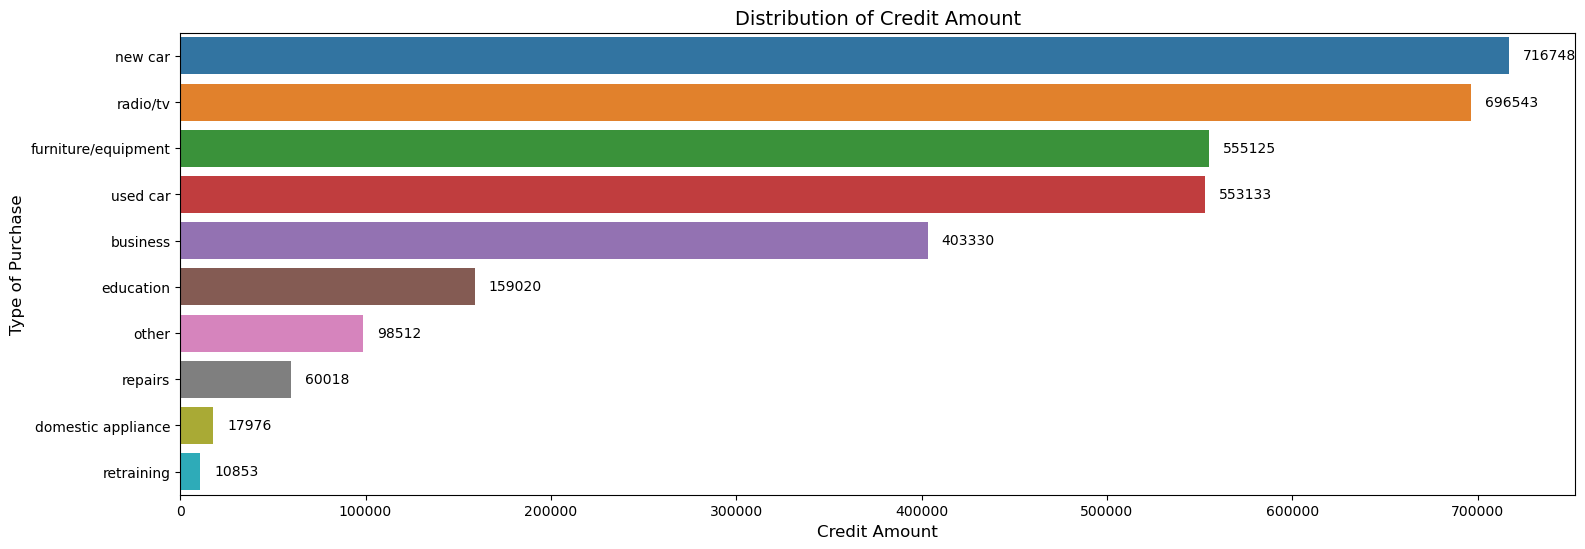

In [33]:
# Let's find out the distribution of credit amounts based on purpose of purchase
# This will tell us where the money was spent and also help us understand the customer base

#dg_purpose = df.groupby(['purpose'])['credit_amount'].sum().reset_index()
#dg_purpose.sort_values('credit_amount',ascending=False, inplace=True)

fig = plt.figure(figsize=(18, 6))
ax = sns.barplot(dg_purpose, x='credit_amount', y='purpose', errorbar=None)
for container in ax.containers:
    ax.bar_label(container, padding=10, rotation=0)

ax.axes.set_title("Distribution of Credit Amount", fontsize=14)
ax.set_xlabel('Credit Amount', fontsize=12)
ax.set_ylabel('Type of Purchase', fontsize=12)

plt.show()

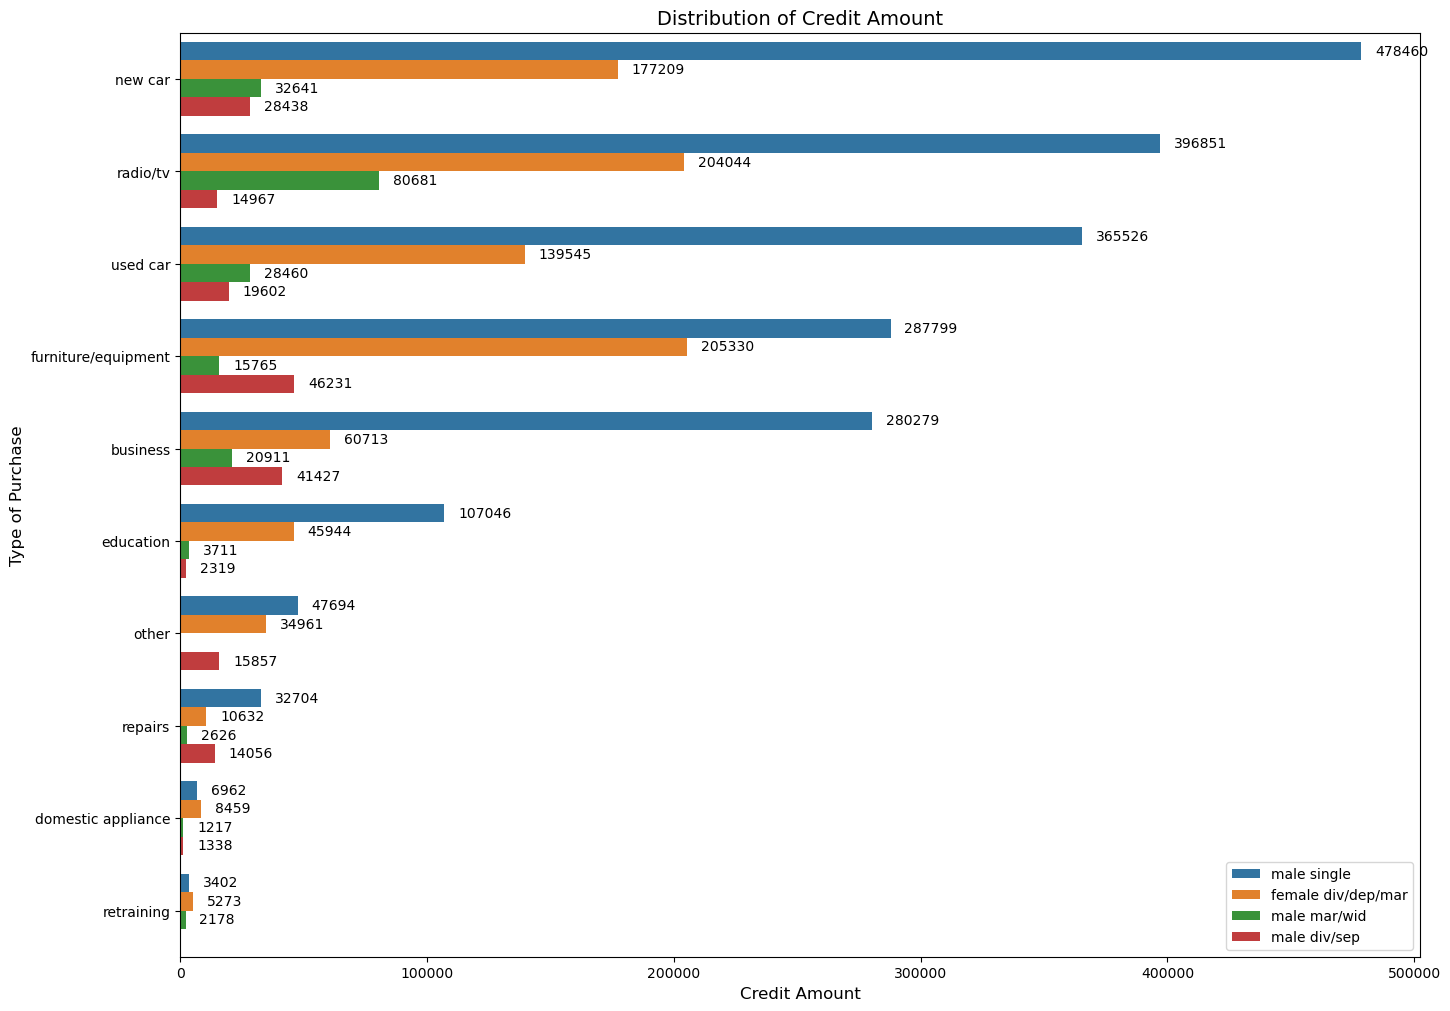

In [34]:
# Let's find out the distribution of credit amounts based on purpose of purchase
# This will tell us where the money was spent and also help us understand the customer base

dg_pstatus = df.groupby(['purpose', 'personal_status'])['credit_amount'] \
               .sum().reset_index() \
               .sort_values('credit_amount', ascending=False)
dg_pstatus

fig = plt.figure(figsize=(16, 12))
ax = sns.barplot(dg_pstatus, x='credit_amount', y='purpose',hue='personal_status', errorbar=None)
for container in ax.containers:
    ax.bar_label(container, padding=10, rotation=0)

ax.axes.set_title("Distribution of Credit Amount", fontsize=14)
ax.set_xlabel('Credit Amount', fontsize=12)
ax.set_ylabel('Type of Purchase', fontsize=12)


plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

In [35]:
to_pay = ['critical/other existing credit', 'delayed previously']
paid = ['existing paid', 'all paid']

In [36]:
df_to_pay = df.query('credit_history in @to_pay')
df_to_pay.head()

checking_status  duration                  credit_history    purpose  \
0               <0         6  critical/other existing credit   radio/tv   
2      no checking        12  critical/other existing credit  education   
4               <0        24              delayed previously    new car   
9         0<=X<200        30  critical/other existing credit    new car   
13              <0        24  critical/other existing credit    new car   

    credit_amount    savings_status  employment  installment_commitment  \
0            1169  no known savings         >=7                       4   
2            2096              <100      4<=X<7                       2   
4            4870              <100      1<=X<4                       3   
9            5234              <100  unemployed                       4   
13           1199              <100         >=7                       4   

   personal_status other_parties  ...   housing existing_credits  \
0      male single          none  ...       own                2   
2      male single          none  ...       own                1   
4      male single          none  ...  for free                2   
9     male mar/wid          none  ...       own                2   
13     male single          none  ...       own                2   

                          job num_dependents own_telephone  foreign_worker  \
0                     skilled              1           yes             yes   
2          unskilled resident              2            no             yes   
4                     skilled              2            no             yes   
9   high qualif/self emp/mgmt              1            no             yes   
13         unskilled resident              1            no             yes   

   class  gender gender_  status_  
0   good    male    male   single  
2   good    male    male   single  
4    bad    male    male   single  
9    bad    male    male  mar/wid  
13   bad    male    male   single  

[5 rows x 24 columns]

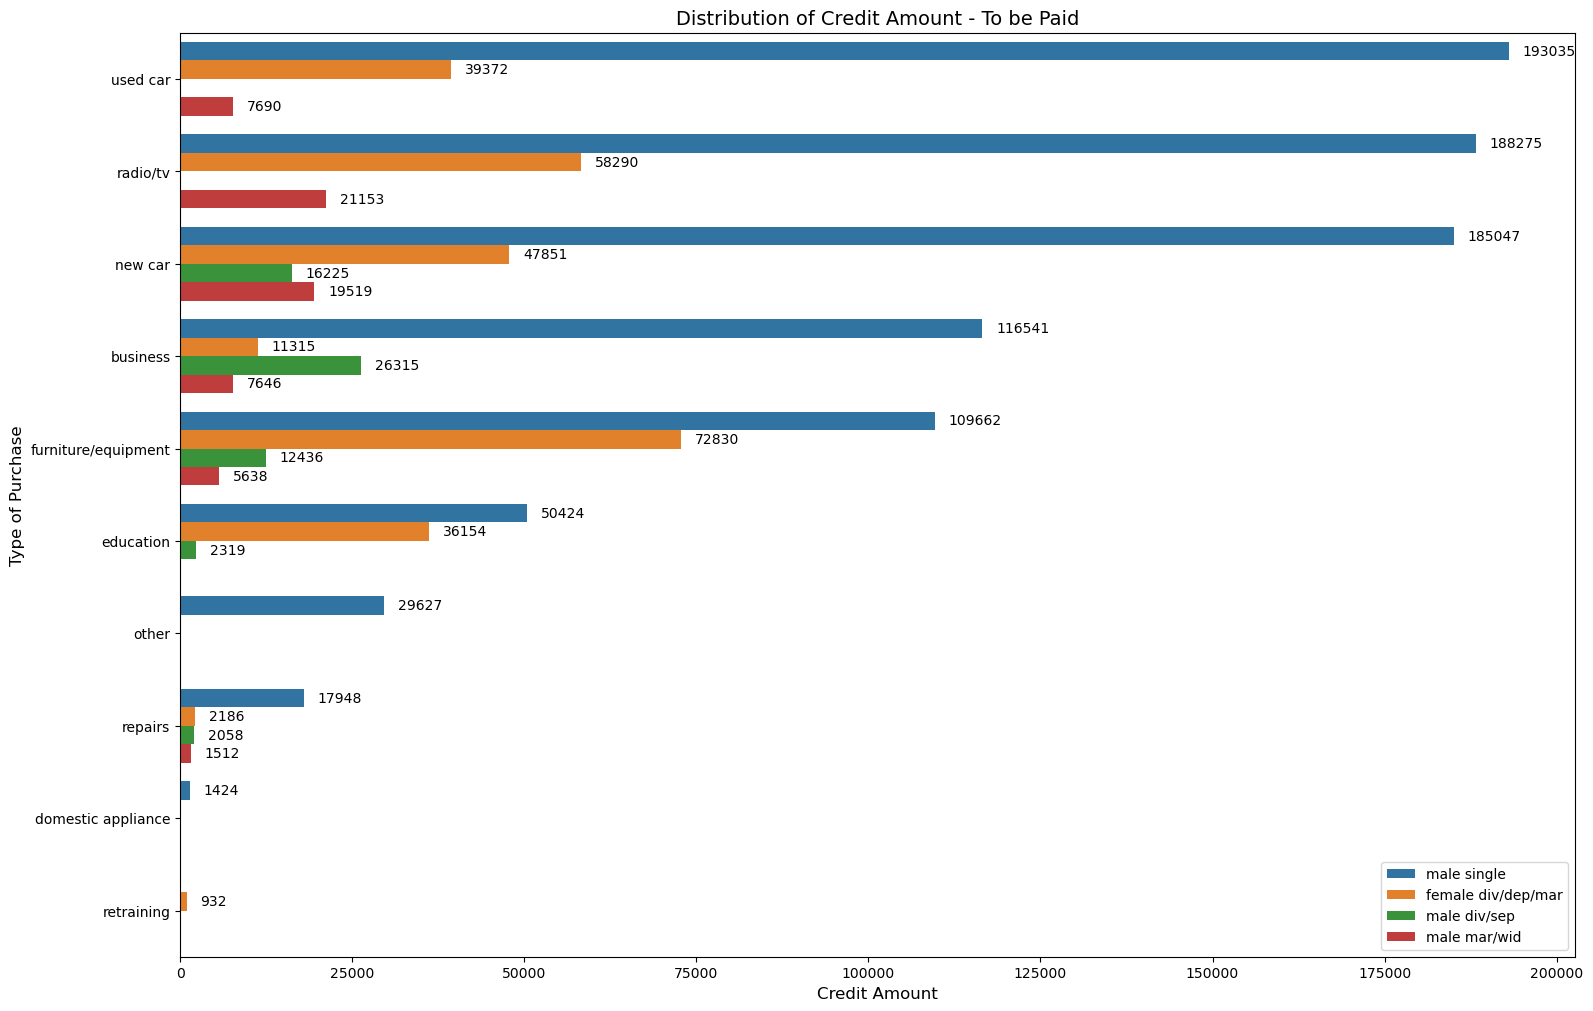

In [37]:
# Let's find out the distribution of credit amounts based on purpose of purchase
# This will tell us where the money was spent and also help us understand the customer base

dg_to_pay_status = df_to_pay.groupby(['purpose', 'personal_status'])['credit_amount'].sum().reset_index().sort_values('credit_amount', ascending=False)
dg_to_pay_status

fig = plt.figure(figsize=(18, 12))
ax = sns.barplot(dg_to_pay_status, 
                 x='credit_amount', y='purpose',hue='personal_status', errorbar=None)
for container in ax.containers:
    ax.bar_label(container, padding=10, rotation=0)

ax.axes.set_title("Distribution of Credit Amount - To be Paid", fontsize=14)
ax.set_xlabel('Credit Amount', fontsize=12)
ax.set_ylabel('Type of Purchase', fontsize=12)


plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

In [38]:
df_to_pay = df.query('credit_history in @to_pay')

dg_to_pay_credit = df_to_pay.groupby(['purpose', 'credit_history'])['credit_amount'].sum().reset_index().sort_values('credit_amount', ascending=False)
dg_to_pay_credit.head()

purpose                  credit_history  credit_amount
7               new car  critical/other existing credit         212853
16             used car  critical/other existing credit         196746
11             radio/tv  critical/other existing credit         178043
5   furniture/equipment  critical/other existing credit         170991
1              business              delayed previously         104001

#### Purchases that Customers struggle to payoff
Let's find out what kind of purchases do customers struggle to payoff

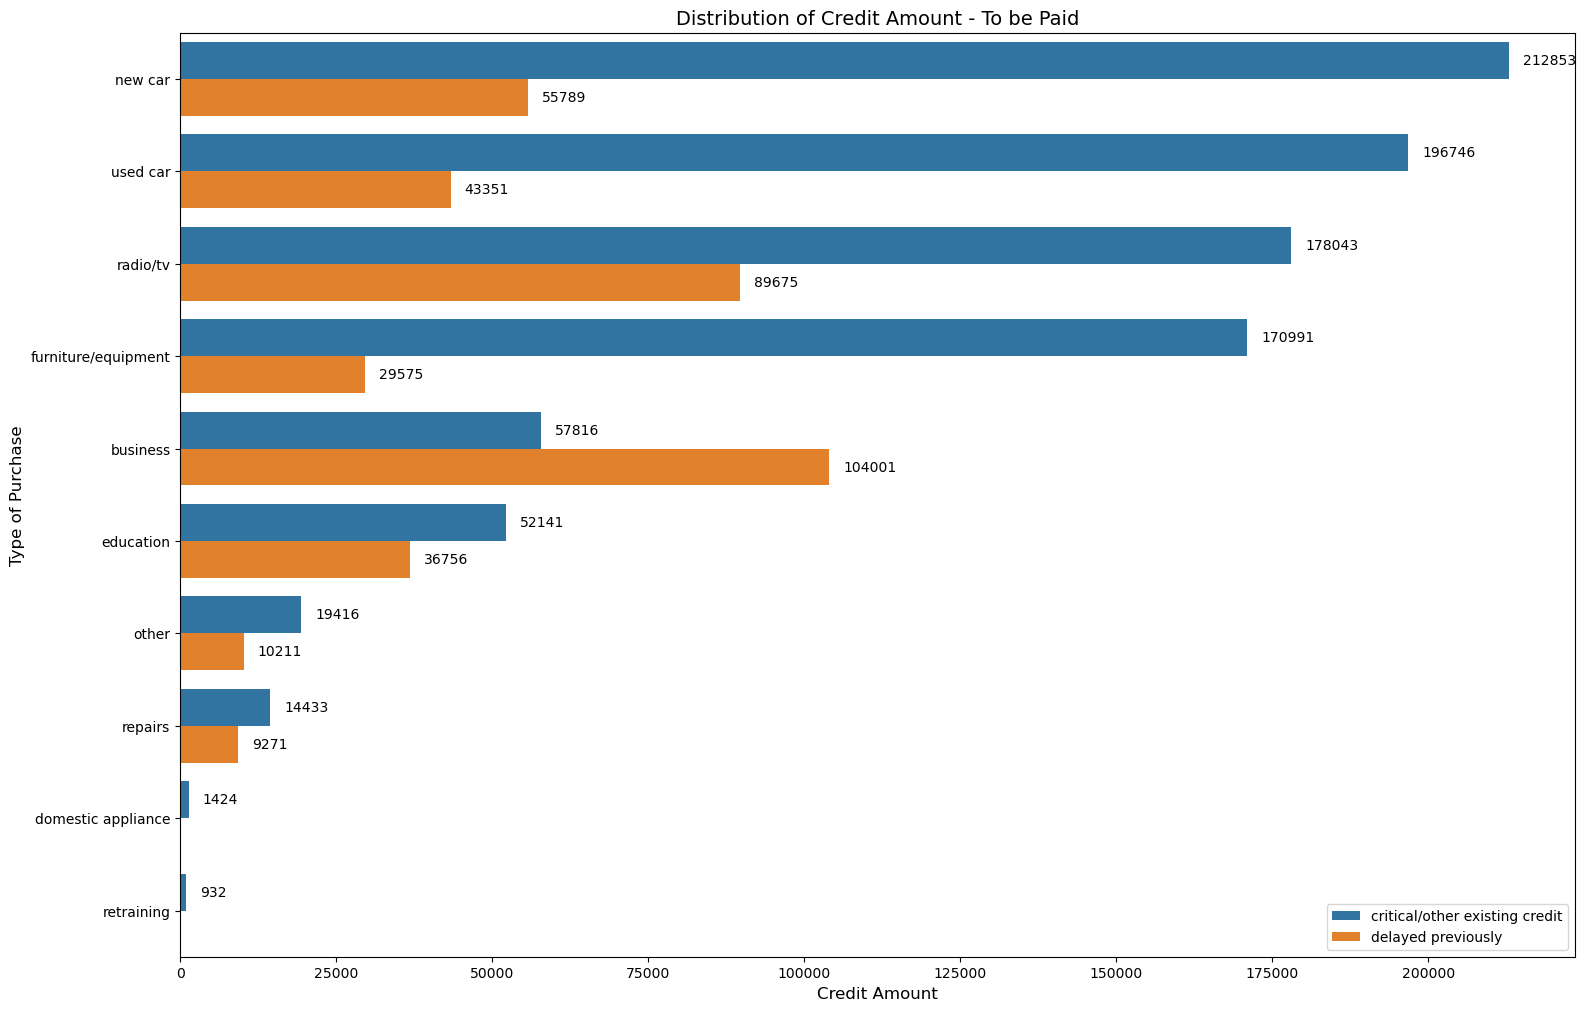

In [39]:
# Let's find out the distribution of credit amounts based on purpose of purchase
# This will tell us where the money was spent and also help us understand the customer base

fig = plt.figure(figsize=(18, 12))
ax = sns.barplot(dg_to_pay_credit, x='credit_amount', y='purpose',hue='credit_history', errorbar=None)
for container in ax.containers:
    ax.bar_label(container, padding=10, rotation=0)

ax.axes.set_title("Distribution of Credit Amount - To be Paid", fontsize=14)
ax.set_xlabel('Credit Amount', fontsize=12)
ax.set_ylabel('Type of Purchase', fontsize=12)


plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

#### Purchases that have been paid off
Let's find out what kind of purchases do customers payoff without delays

In [40]:
df_to_pay = df.query('credit_history in @paid')

dg_paid_credit = df_to_pay.groupby(['purpose', 'credit_history'])['credit_amount'].sum().reset_index().sort_values('credit_amount', ascending=False)
dg_paid_credit.head()

purpose credit_history  credit_amount
13             radio/tv  existing paid         404577
9               new car  existing paid         390257
7   furniture/equipment  existing paid         299782
19             used car  existing paid         259494
0              business       all paid         134771

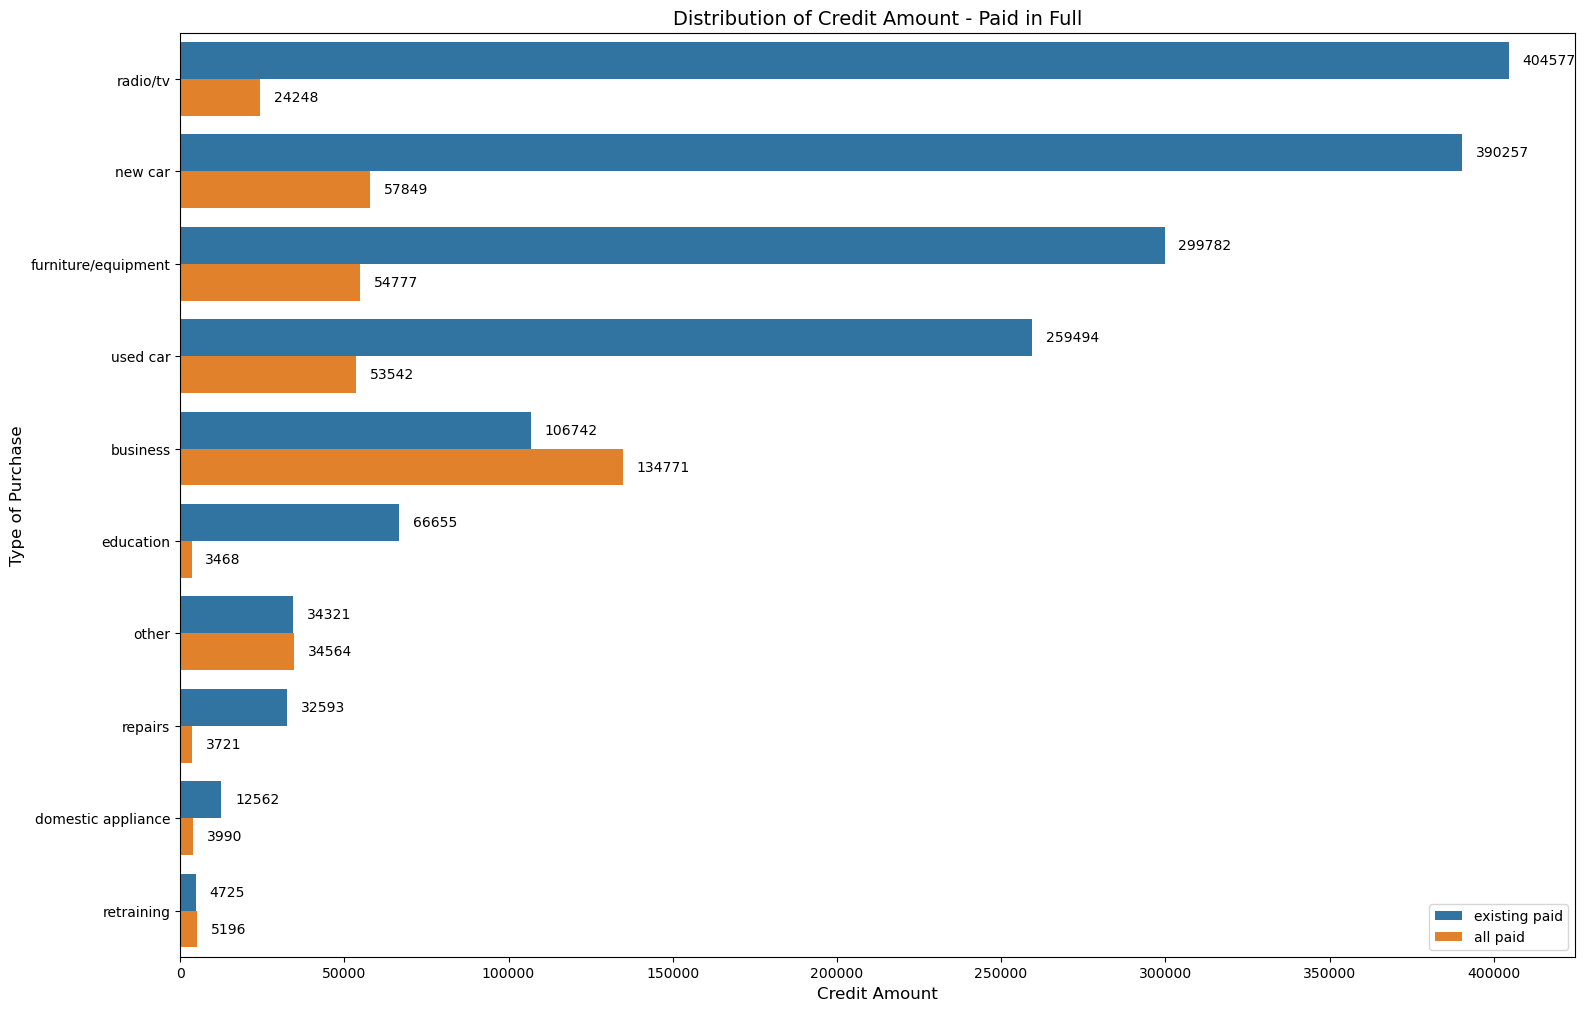

In [41]:
# Let's find out the distribution of credit amounts based on purpose of purchase
# This will tell us where the money was spent and also help us understand the customer base

fig = plt.figure(figsize=(18, 12))
ax = sns.barplot(dg_paid_credit, x='credit_amount', y='purpose',hue='credit_history', errorbar=None)
for container in ax.containers:
    ax.bar_label(container, padding=10, rotation=0)

ax.axes.set_title("Distribution of Credit Amount - Paid in Full", fontsize=14)
ax.set_xlabel('Credit Amount', fontsize=12)
ax.set_ylabel('Type of Purchase', fontsize=12)


plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

In [42]:
df_paid = df.query('credit_history in @paid')
df_paid.head()

checking_status  duration credit_history              purpose  \
1        0<=X<200        48  existing paid             radio/tv   
3              <0        42  existing paid  furniture/equipment   
5     no checking        36  existing paid            education   
6     no checking        24  existing paid  furniture/equipment   
7        0<=X<200        36  existing paid             used car   

   credit_amount    savings_status employment  installment_commitment  \
1           5951              <100     1<=X<4                       2   
3           7882              <100     4<=X<7                       2   
5           9055  no known savings     1<=X<4                       2   
6           2835       500<=X<1000        >=7                       3   
7           6948              <100     1<=X<4                       2   

      personal_status other_parties  ...   housing existing_credits  \
1  female div/dep/mar          none  ...       own                1   
3         male single     guarantor  ...  for free                1   
5         male single          none  ...  for free                1   
6         male single          none  ...       own                1   
7         male single          none  ...      rent                1   

                         job num_dependents own_telephone  foreign_worker  \
1                    skilled              1            no             yes   
3                    skilled              2            no             yes   
5         unskilled resident              2           yes             yes   
6                    skilled              1            no             yes   
7  high qualif/self emp/mgmt              1           yes             yes   

  class  gender gender_      status_  
1   bad  female  female  div/dep/mar  
3  good    male    male       single  
5  good    male    male       single  
6  good    male    male       single  
7  good    male    male       single  

[5 rows x 24 columns]

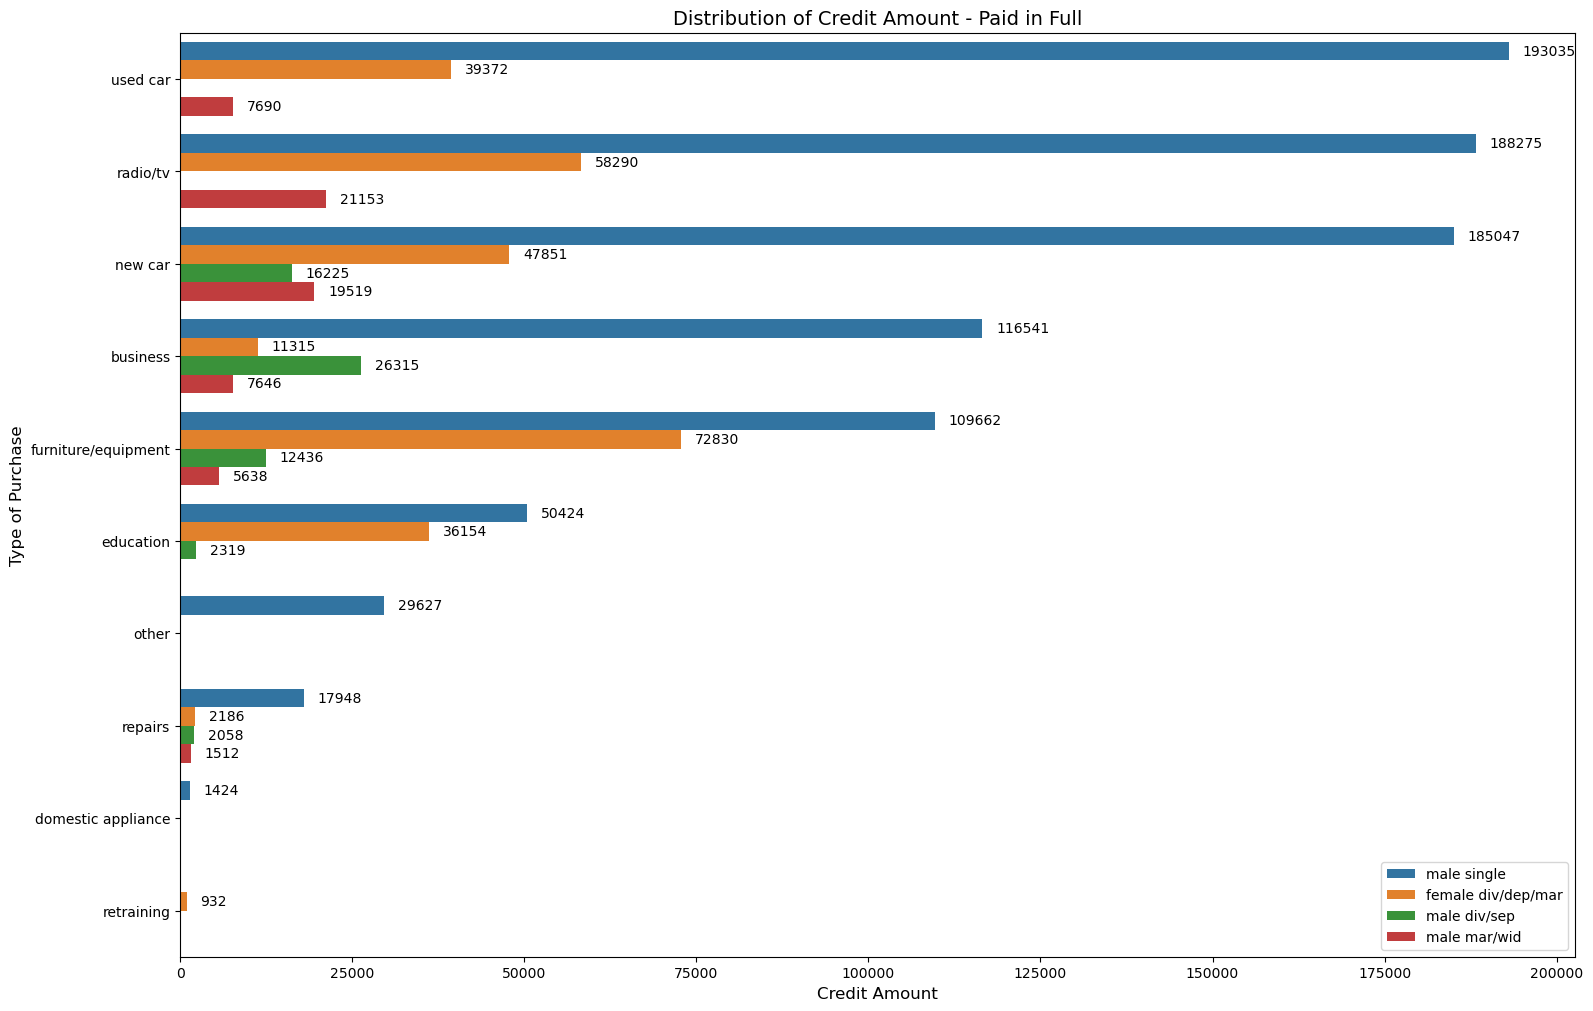

In [43]:
# Let's find out the distribution of credit amounts based on purpose of purchase
# This will tell us where the money was spent and also help us understand the customer base

dg_paid_status = df_paid.groupby(['purpose', 'personal_status'])['credit_amount'].sum().reset_index().sort_values('credit_amount', ascending=False)
dg_paid_status

fig = plt.figure(figsize=(18, 12))
ax = sns.barplot(dg_to_pay_status, 
                 x='credit_amount', y='purpose',hue='personal_status', errorbar=None)
for container in ax.containers:
    ax.bar_label(container, padding=10, rotation=0)

ax.axes.set_title("Distribution of Credit Amount - Paid in Full", fontsize=14)
ax.set_xlabel('Credit Amount', fontsize=12)
ax.set_ylabel('Type of Purchase', fontsize=12)


plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

In [44]:
# Let's find out how Male Single have made payments even though they have bad credit
# We will find out what kind of products they purchase

dx = df[df['class'] == "bad"].query('credit_history in @paid and personal_status == "male single"')

fig = plt.figure(figsize=(18, 12))
px.scatter(data_frame=dx, x = 'credit_amount', y = 'purpose',
          title=("Distribution of Credit Amount - Male Single : Paid"),
          labels={'credit_amount':'Credit Amount', 'purpose':'Type of Purchase'})

<Figure size 1800x1200 with 0 Axes>

In [45]:
# Let's find out how Male Single have made outstanding payments with bad credit
# We will find out what kind of products they purchase

dx = df[df['class'] == "bad"].query('credit_history in @to_pay and personal_status == "male single"')

fig = plt.figure(figsize=(18, 12))
px.scatter(data_frame=dx, x = 'credit_amount', y = 'purpose',
          title=("Distribution of Credit Amount - Male Single : To Pay"),
          labels={'credit_amount':'Credit Amount', 'purpose':'Type of Purchase'})

<Figure size 1800x1200 with 0 Axes>

In [46]:
df['class'].unique()

array(['good', 'bad'], dtype=object)

In [47]:
dx = df[df['class'] == "bad"].query('credit_history in @paid and personal_status == "male single"')
dx.head()

checking_status  duration credit_history    purpose  credit_amount  \
37           >=200        18  existing paid   radio/tv           2100   
56        0<=X<200        12  existing paid   radio/tv           6468   
62        0<=X<200        36       all paid   business           1953   
63        0<=X<200        48       all paid   business          14421   
68     no checking        36  existing paid  education           1819   

      savings_status  employment  installment_commitment personal_status  \
37              <100      1<=X<4                       4     male single   
56  no known savings  unemployed                       2     male single   
62              <100         >=7                       4     male single   
63              <100      1<=X<4                       2     male single   
68              <100      1<=X<4                       4     male single   

   other_parties  ...   housing existing_credits                        job  \
37  co applicant  ...       own                1                    skilled   
56          none  ...       own                1  high qualif/self emp/mgmt   
62          none  ...  for free                1  high qualif/self emp/mgmt   
63          none  ...       own                1                    skilled   
68          none  ...  for free                1                    skilled   

   num_dependents own_telephone  foreign_worker class  gender gender_ status_  
37              1            no             yes   bad    male    male  single  
56              1           yes             yes   bad    male    male  single  
62              1           yes             yes   bad    male    male  single  
63              1           yes             yes   bad    male    male  single  
68              1           yes             yes   bad    male    male  single  

[5 rows x 24 columns]

In [48]:
dy = df[df['class'] == "bad"].query('credit_history in @to_pay and personal_status == "male single"')
dy.head()

checking_status  duration                  credit_history   purpose  \
4               <0        24              delayed previously   new car   
13              <0        24  critical/other existing credit   new car   
29              <0        60              delayed previously  business   
35        0<=X<200        45  critical/other existing credit  radio/tv   
54        0<=X<200        36              delayed previously   new car   

    credit_amount savings_status employment  installment_commitment  \
4            4870           <100     1<=X<4                       3   
13           1199           <100        >=7                       4   
29           6836           <100        >=7                       3   
35           4746           <100         <1                       4   
54           2225           <100        >=7                       4   

   personal_status other_parties  ...   housing existing_credits  \
4      male single          none  ...  for free                2   
13     male single          none  ...       own                2   
29     male single          none  ...       own                2   
35     male single          none  ...       own                2   
54     male single          none  ...  for free                2   

                   job num_dependents own_telephone  foreign_worker class  \
4              skilled              2            no             yes   bad   
13  unskilled resident              1            no             yes   bad   
29             skilled              1           yes             yes   bad   
35  unskilled resident              1            no             yes   bad   
54             skilled              1           yes             yes   bad   

    gender gender_ status_  
4     male    male  single  
13    male    male  single  
29    male    male  single  
35    male    male  single  
54    male    male  single  

[5 rows x 24 columns]

### Conclusion: 
Single Men borrow more and are at risk of making payments. We also find that single men are able to pay off the loans sooner. However, there are many other factors that contribute to making them a risky customer such as employment status.